<a href="https://colab.research.google.com/github/julianaquin/AnalisisDatosTurismo/blob/main/Analisis_turismo_en_el_Valle_del_Cauca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de la tabla de datos turísticos en el Valle del Cauca
de los años 2021 y 2022 presentados en el portal de datos.gov


In [330]:
#mise en place

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
archivo = files.upload()

Saving Turismo_Receptivo_en_el_Valle_del_Cauca.csv to Turismo_Receptivo_en_el_Valle_del_Cauca.csv


In [6]:
datos_turismo = pd.read_csv('Turismo_Receptivo_en_el_Valle_del_Cauca.csv')
datos_turismo.head(17)

,GENERO,PAÍS DE PROCEDENCIA,DEPARTAMENTO,RANGO EDAD,MOTIVO VIAJE,NOCHES,TIPO ALOJAMIENTO,GASTO TURISTICO GENERADO,MEDIO,AÑO
0,MASCULINO,COLOMBIA,QUINDÍO,39-50,VISITAR A FAMILIARES Y/O AMIGOS,2,HOTEL,"500,000",YA LOS CONOCÍA,"2,021"
1,FEMENINO,COLOMBIA,QUINDÍO,39-50,"VACACIONES, RECREO Y OCIO",2,HOTEL,"150,000",AMIGOS Y/O FAMILIARES.,"2,021"
2,MASCULINO,COLOMBIA,QUINDÍO,15-26,"VACACIONES, RECREO Y OCIO",2,HOTEL,"150,000",AMIGOS Y/O FAMILIARES.,"2,021"
3,FEMENINO,COLOMBIA,CAUCA,27-38,VISITAR A FAMILIARES Y/O AMIGOS,1,CASA FAMILIARES / AMIGOS,"650,000",AMIGOS Y/O FAMILIARES.,"2,021"
4,MASCULINO,COLOMBIA,CAUCA,27-38,VISITAR A FAMILIARES Y/O AMIGOS,1,CASA FAMILIARES / AMIGOS,0,YA LOS CONOCÍA,"2,021"
5,FEMENINO,COLOMBIA,CAUCA,27-38,VISITAR A FAMILIARES Y/O AMIGOS,2,CASA FAMILIARES / AMIGOS,"170,000",AMIGOS Y/O FAMILIARES.,"2,021"
6,FEMENINO,COLOMBIA,ANTIOQUIA,15-26,"VACACIONES, RECREO Y OCIO",2,HOSTAL / ALBERGUE / REFUGIO / POSADA TURÍSTICA,"450,000",AMIGOS Y/O FAMILIARES.,"2,021"
7,MASCULINO,COLOMBIA,ANTIOQUIA,39-50,TURISMO ESPIRITUAL: ACTIVIDADES RELIGIOSAS Y E...,3,HOSTAL / ALBERGUE / REFUGIO / POSADA TURÍSTICA,"600,000",POR LA EMPRESA,"2,021"
8,FEMENINO,COLOMBIA,CUNDINAMARCA,51-62,TURISMO ESPIRITUAL: ACTIVIDADES RELIGIOSAS Y E...,4,CASA FAMILIARES / AMIGOS,"1,500,000",AMIGOS Y/O FAMILIARES.,"2,021"
9,FEMENINO,COLOMBIA,CUNDINAMARCA,39-50,VISITAR A FAMILIARES Y/O AMIGOS,4,CASA FAMILIARES / AMIGOS,"800,000",AMIGOS Y/O FAMILIARES.,"2,021"


In [44]:
datos_2022 = datos_turismo[datos_turismo['AÑO'] == '2,022']
datos_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 503 to 1702
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENERO                    1200 non-null   object
 1   PAÍS DE PROCEDENCIA       1200 non-null   object
 2   DEPARTAMENTO              1200 non-null   object
 3   RANGO EDAD                1200 non-null   object
 4   MOTIVO VIAJE              1200 non-null   object
 5   NOCHES                    1200 non-null   object
 6   TIPO ALOJAMIENTO          1200 non-null   object
 7   GASTO TURISTICO GENERADO  1200 non-null   object
 8   MEDIO                     1200 non-null   object
 9   AÑO                       1200 non-null   object
dtypes: object(10)
memory usage: 103.1+ KB


In [118]:
# se observa la lista de paises de procedencia de los visitantes
datos_2022['PAÍS DE PROCEDENCIA'].value_counts()

COLOMBIA                     1058
SIN INFORMACION                54
ECUADOR                        27
ESTADOS UNIDOS DE AMÉRICA      16
CHILE                           9
FRANCIA                         6
ESPAÑA                          6
VENEZUELA                       4
MÉXICO                          3
SUIZA                           3
GUAYANA FRANCESA                3
BRASIL                          2
REPÚBLICA DOMINICANA            2
PERÚ                            1
ITALIA                          1
POLONIA                         1
PUERTO RICO                     1
CANADÁ                          1
PAÍSES BAJOS                    1
IRLANDA                         1
Name: PAÍS DE PROCEDENCIA, dtype: int64

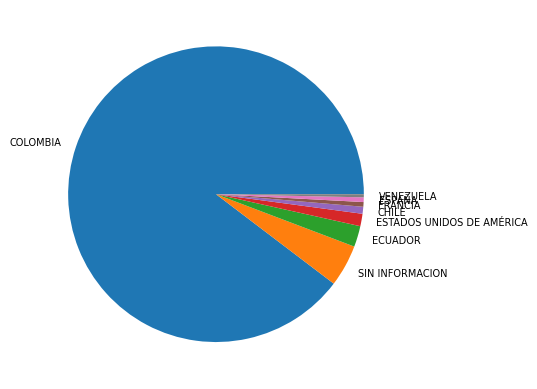

In [335]:
#Eliminar datos irrelevantes y visualizar datos en diagrama de torta
datos_2022_limpios = datos_2022['PAÍS DE PROCEDENCIA'].value_counts()

grouped = datos_2022['PAÍS DE PROCEDENCIA'].value_counts().groupby(datos_2022['PAÍS DE PROCEDENCIA'].value_counts())

df1 = grouped.get_group(1)
df2 = grouped.get_group(2)
df3 = grouped.get_group(3)

datos_2022_limpios= datos_2022_limpios.drop(grouped.get_group(1).index)
datos_2022_limpios= datos_2022_limpios.drop(grouped.get_group(2).index)
datos_2022_limpios= datos_2022_limpios.drop(grouped.get_group(3).index)


torta= plt.pie(datos_2022_limpios, labels= (datos_2022_limpios.axes[0]), textprops={'fontsize': 7})

In [308]:
turistas_nacionales_2022 = datos_2022[datos_2022['PAÍS DE PROCEDENCIA'] == 'COLOMBIA']
turistas_nacionales_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 503 to 1702
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENERO                    1058 non-null   object
 1   PAÍS DE PROCEDENCIA       1058 non-null   object
 2   DEPARTAMENTO              1058 non-null   object
 3   RANGO EDAD                1058 non-null   object
 4   MOTIVO VIAJE              1058 non-null   object
 5   NOCHES                    1058 non-null   object
 6   TIPO ALOJAMIENTO          1058 non-null   object
 7   GASTO TURISTICO GENERADO  1058 non-null   object
 8   MEDIO                     1058 non-null   object
 9   AÑO                       1058 non-null   object
dtypes: object(10)
memory usage: 90.9+ KB


In [311]:
turistas_nacionales_2022['GASTO TURISTICO GENERADO'] = turistas_nacionales_2022['GASTO TURISTICO GENERADO'].str.replace(',','')
turistas_nacionales_2022['GASTO TURISTICO GENERADO']= pd.to_numeric(turistas_nacionales_2022['GASTO TURISTICO GENERADO'])
turistas_nacionales_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 503 to 1702
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENERO                    1058 non-null   object
 1   PAÍS DE PROCEDENCIA       1058 non-null   object
 2   DEPARTAMENTO              1058 non-null   object
 3   RANGO EDAD                1058 non-null   object
 4   MOTIVO VIAJE              1058 non-null   object
 5   NOCHES                    1058 non-null   object
 6   TIPO ALOJAMIENTO          1058 non-null   object
 7   GASTO TURISTICO GENERADO  1058 non-null   int64 
 8   MEDIO                     1058 non-null   object
 9   AÑO                       1058 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.9+ KB


In [312]:
turistas_nacionales_2022['GASTO TURISTICO GENERADO'].describe()

count    1.058000e+03
mean     8.471456e+05
std      2.920377e+06
min      0.000000e+00
25%      3.000000e+05
50%      7.000000e+05
75%      9.000000e+05
max      6.000000e+07
Name: GASTO TURISTICO GENERADO, dtype: float64